In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('china_fdi.xlsx', )

In [3]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,390,390,393,390,390,319,64,268,390,33
unique,16,20,6,49,291,319,28,194,188,31
top,2016,"Electronics (e.g. software, batteries)",M&A,California,Dalian Wanda Group Corp Ltd,Pocket Gems Inc,Undisclosed,100,PR Newswire,Blackstone Group (divestor)
freq,90,71,316,113,11,1,19,10,46,2


In [4]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,Consolidated China FDI Transactions - 2002-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Public Citizen's Global Trade Watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,"Last Updated: December 19, 2017",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
392,2004,"Electronics (e.g. software, batteries)",M&A,New York,Lenovo Group Ltd,International Business Machines Corp - IBM (Pe...,NaN,1750,NBC News,NaN
393,2004,Industrial Machinery & Equip. Manufacturing,M&A,Utah,Polatechno Co Ltd,Moxtek Inc,NaN,NaN,Polatechno Co Ltd Company History,NaN
394,2004,Business Services,M&A,Pennsylvania,Shanghai Super Industrial Co Ltd,Axxexs Capital Inc,NaN,NaN,The Free Library,NaN
395,2003,Automotive,M&A,Illinois,Wanxiang Qianchao Co Ltd,Rockford Powertrain Inc (Equity Interest),NaN,NaN,Chicago Tribune,NaN
396,2002,Industrial Machinery & Equip. Manufacturing,M&A,Illinois,Dalian Machine Tool Group Co Ltd,Ingersoll International (Ingersoll Production ...,NaN,NaN,Gardner Publications,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [7]:
df.columns = ['Year', 'Sector', 'Entry_Mode', 'State', 'Foreign_Acquirer', 'US_Target', 'Stake_Acquired', 'Transaction_Value', 'Source', 'US_Investor']

In [8]:
df.head(10)

,Year,Sector,Entry_Mode,State,Foreign_Acquirer,US_Target,Stake_Acquired,Transaction_Value,Source,US_Investor
0,NaN,NaN,Consolidated China FDI Transactions - 2002-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Public Citizen's Global Trade Watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,"Last Updated: December 19, 2017",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Year,Sector,Entry Mode,State,Investor(s),Target (M&A Only),% Stake Acquired (if not 100%),Value ($ million),Source,U.S. Financial Entity/Nature of Involvement
8,2016,"Electronics (e.g. software, batteries)",M&A,New York,Alibaba Group Holding Ltd,eApeiron Solutions Inc,NaN,NaN,Business Wire,NaN
9,2016,"Electronics (e.g. software, batteries)",M&A,New York,Alibaba Group Holding Ltd,PlaceIQ Inc,Minority stake,NaN,Reuters,NaN


In [9]:
df = df.drop(df.index[0:8])

In [10]:
df.dtypes

Year                 object
Sector               object
Entry_Mode           object
State                object
Foreign_Acquirer     object
US_Target            object
Stake_Acquired       object
Transaction_Value    object
Source               object
US_Investor          object
dtype: object

In [11]:
df[df['Year'].notnull() & df['Transaction_Value'].notnull() & df['Entry_Mode'].notnull()]

,Year,Sector,Entry_Mode,State,Foreign_Acquirer,US_Target,Stake_Acquired,Transaction_Value,Source,US_Investor
10,2016,"Electronics (e.g. software, batteries)",M&A,Florida,Alibaba Group Holding Ltd and partners,Magic Leap Inc,18,793.5,Forbes,NaN
11,2016,"Consumer Products & Services (e.g. textiles, a...",M&A,California,Alpha Group,Baby Trend Inc,NaN,94,Reuters,NaN
12,2016,Real Estate & Construction,M&A,Multiple states,Anbang Insurance Group Co Ltd,Strategic Hotels & Resorts Inc,Majority stake,5500,Financial Times,Blackstone Group (divestor)
13,2016,"Electronics (e.g. software, batteries)",M&A,Missouri,Ant Financial Services Group,EyeVerify Inc,NaN,100,South China Morning Post,NaN
14,2016,"Electronics (e.g. software, batteries)",M&A,Kentucky,Apex Technology Co Ltd; Legend Capital Co Ltd ...,Lexmark International Inc,NaN,3613.83,CNBC,NaN
15,2016,"Electronics (e.g. software, batteries)",M&A,California,Baidu Inc; Ford Motor Co,Velodyne LiDAR Inc,NaN,75,Los Angeles Times,NaN
16,2016,"Electronics (e.g. software, batteries)",M&A,California,Cybernaut Venture Capital Management Co Ltd an...,Kateeva Inc,Undisclosed,88,NASDAQ Market Wired press release,Spark Capital and partners (co-investors)
17,2016,Automotive,Greenfield,California,BYD America,NaN,NaN,254.6,Xinhua Net,NaN
18,2016,Real Estate & Construction,M&A,New York,China Investment Corp,"Property Portfolio (McGraw-Hill Building, 1221...",NaN,1030,The Real Deal New York,NaN
19,2016,Real Estate & Construction,M&A,New York,China Investment Corp,Property Portfolio (One New York Plaza),NaN,700,The Real Deal,Brookfield Asset Management Inc (divestor)


In [12]:
df[['Year','Transaction_Value']] = df[['Year','Transaction_Value']].apply(pd.to_numeric)

In [13]:
df.dtypes

Year                   int64
Sector                object
Entry_Mode            object
State                 object
Foreign_Acquirer      object
US_Target             object
Stake_Acquired        object
Transaction_Value    float64
Source                object
US_Investor           object
dtype: object

[Text(0,0.5,'Number of Transactions'),
 Text(0.5,0,'Transaction Type'),
 Text(0.5,1,'Chinese Investment in the US, by Transaction Type (2002-2016)')]

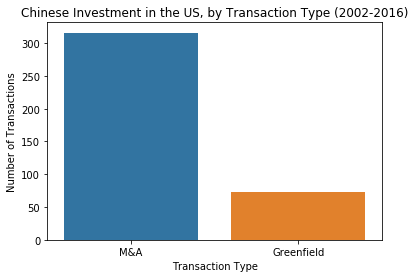

In [14]:
p = sns.countplot(data=df, x = 'Entry_Mode')
p.set(xlabel='Transaction Type',
      ylabel='Number of Transactions',
      title='Chinese Investment in the US, by Transaction Type (2002-2016)')

[Text(0,0.5,'Sector'),
 Text(0.5,0,'Number of Transactions'),
 Text(0.5,1,'Chinese Investment in the US, by Sector (2002-2016)')]

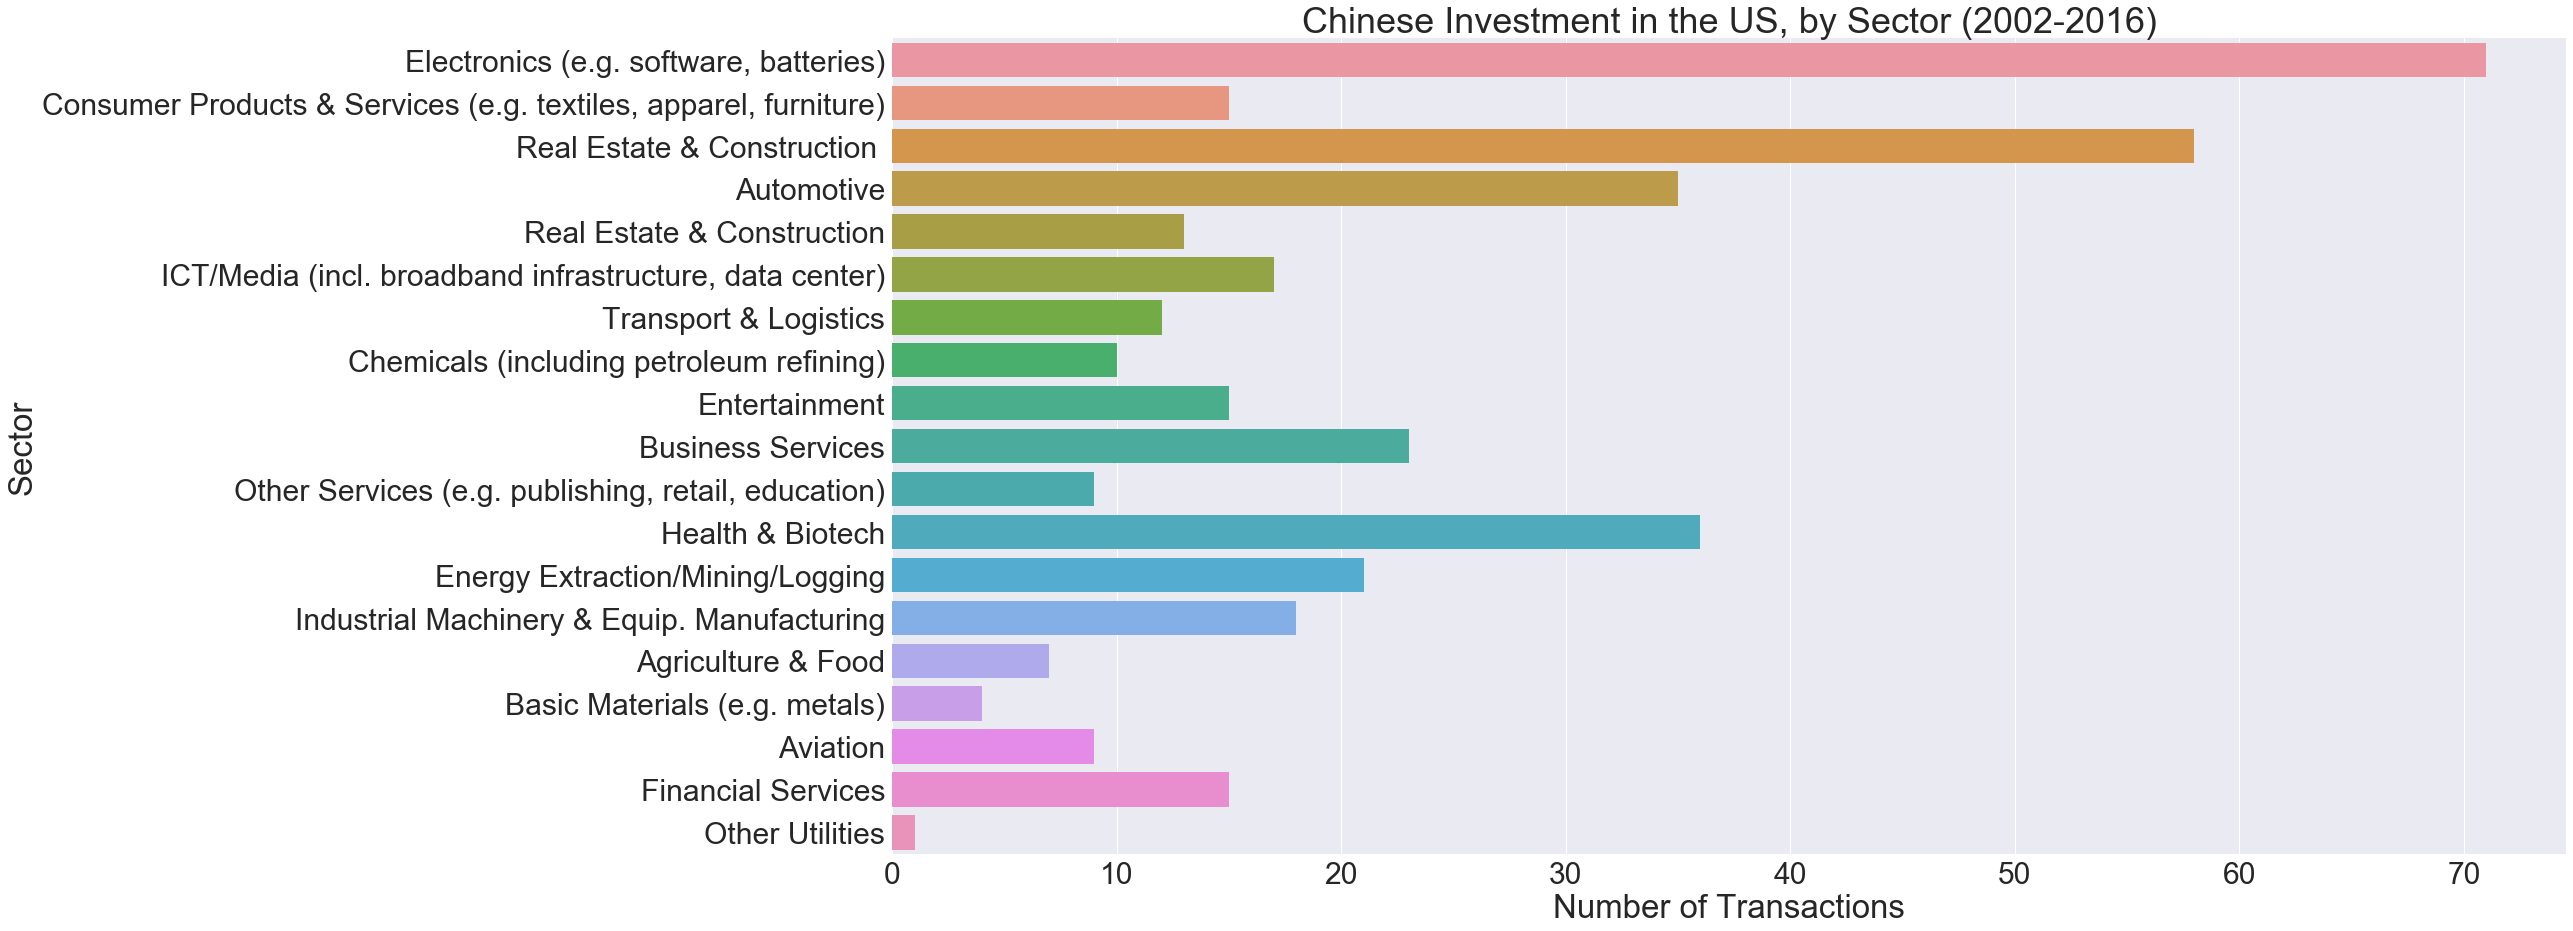

In [15]:
plt.rcParams['figure.figsize'] = (30.0, 15.0)
plt.rcParams['font.family'] = "serif"
sns.set(font_scale=3)
g = sns.countplot(data=df, y = 'Sector')
g.set(xlabel='Number of Transactions',
      ylabel='Sector',
      title='Chinese Investment in the US, by Sector (2002-2016)')

[Text(0,0.5,'Number of Transactions'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'Chinese Investment in the US, by Year')]

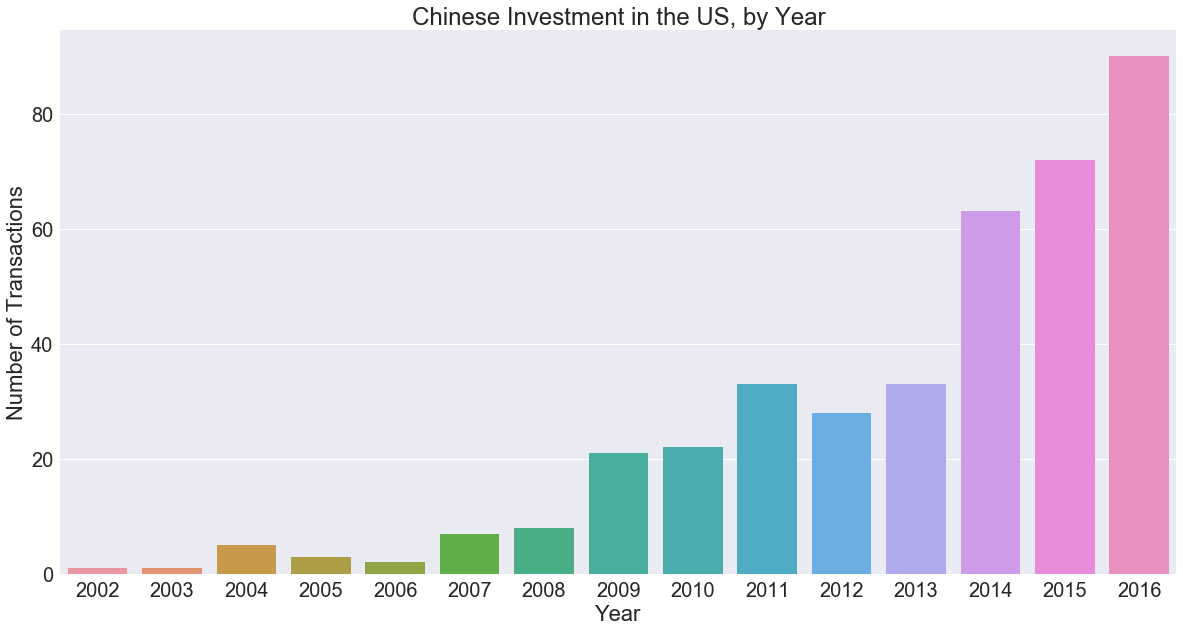

In [16]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.set(font_scale=2)
a = sns.countplot(data=df, x = 'Year')
a.set(xlabel='Year',
      ylabel='Number of Transactions',
      title='Chinese Investment in the US, by Year')

In [17]:
df1 = df.groupby(["Sector"])[['Transaction_Value']].sum().sort_values('Transaction_Value', ascending = False)
df1

,Transaction_Value
Sector,
Real Estate & Construction,42805.475
"Electronics (e.g. software, batteries)",24880.303
Energy Extraction/Mining/Logging,12607.095
Financial Services,9658.131
"Consumer Products & Services (e.g. textiles, apparel, furniture)",9097.362
Entertainment,7999.462
Agriculture & Food,7537.843
Transport & Logistics,7424.041
Automotive,5882.885


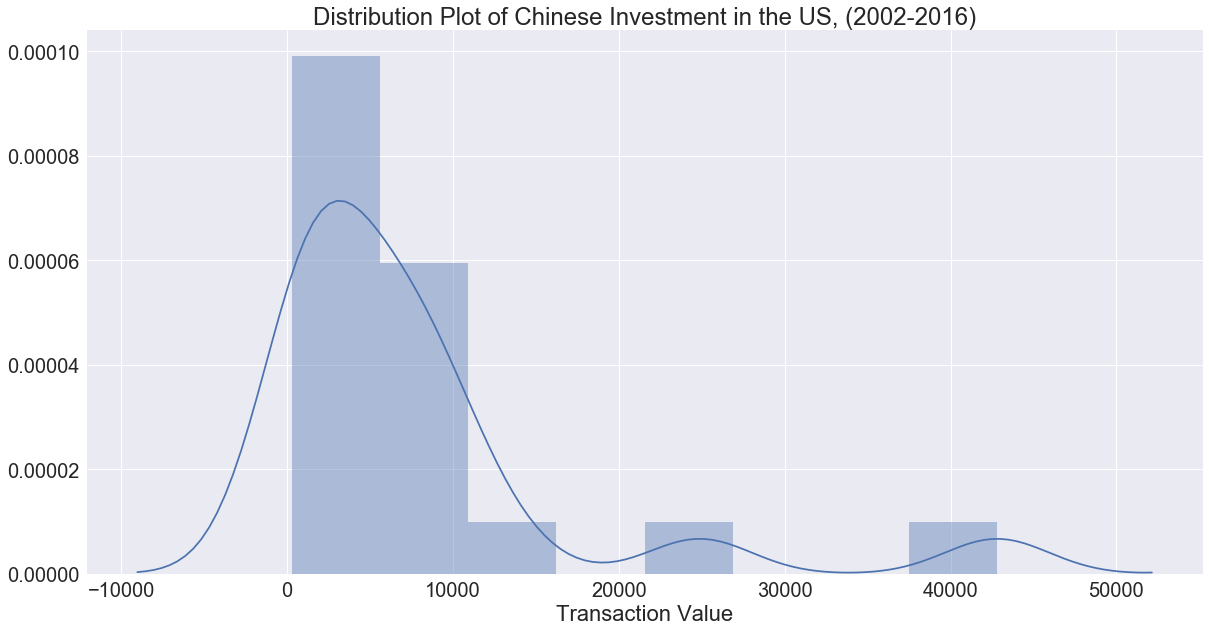

In [18]:
b = sns.distplot(df1.Transaction_Value.dropna())
b.set(xlabel='Transaction Value',
      title='Distribution Plot of Chinese Investment in the US, (2002-2016)')
b

In [20]:
c = pd.pivot_table(data=df, index='Sector',
                    values='Transaction_Value',
                    columns='Year')
c.head()

Year,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sector,,,,,,,,,,,,
Agriculture & Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7099.093,166.25,127.500000,145.000000
Automotive,NaN,NaN,NaN,NaN,148.0,309.65,NaN,70.0,360.000,115.40,241.083571,227.618182
Aviation,NaN,NaN,NaN,NaN,NaN,NaN,198.0,NaN,80.000,NaN,NaN,NaN
Basic Materials (e.g. metals),NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,108.266000
Business Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,95.50,444.975000,193.400000


In [21]:
c = c.fillna(0)
c.head()

Year,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sector,,,,,,,,,,,,
Agriculture & Food,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7099.093,166.25,127.500000,145.000000
Automotive,0.0,0.0,0.0,0.0,148.0,309.65,0.0,70.0,360.000,115.40,241.083571,227.618182
Aviation,0.0,0.0,0.0,0.0,0.0,0.00,198.0,0.0,80.000,0.00,0.000000,0.000000
Basic Materials (e.g. metals),0.0,0.0,0.0,0.0,0.0,0.00,100.0,0.0,0.000,0.00,0.000000,108.266000
Business Services,0.0,0.0,0.0,0.0,0.0,0.00,0.0,75.0,0.000,95.50,444.975000,193.400000


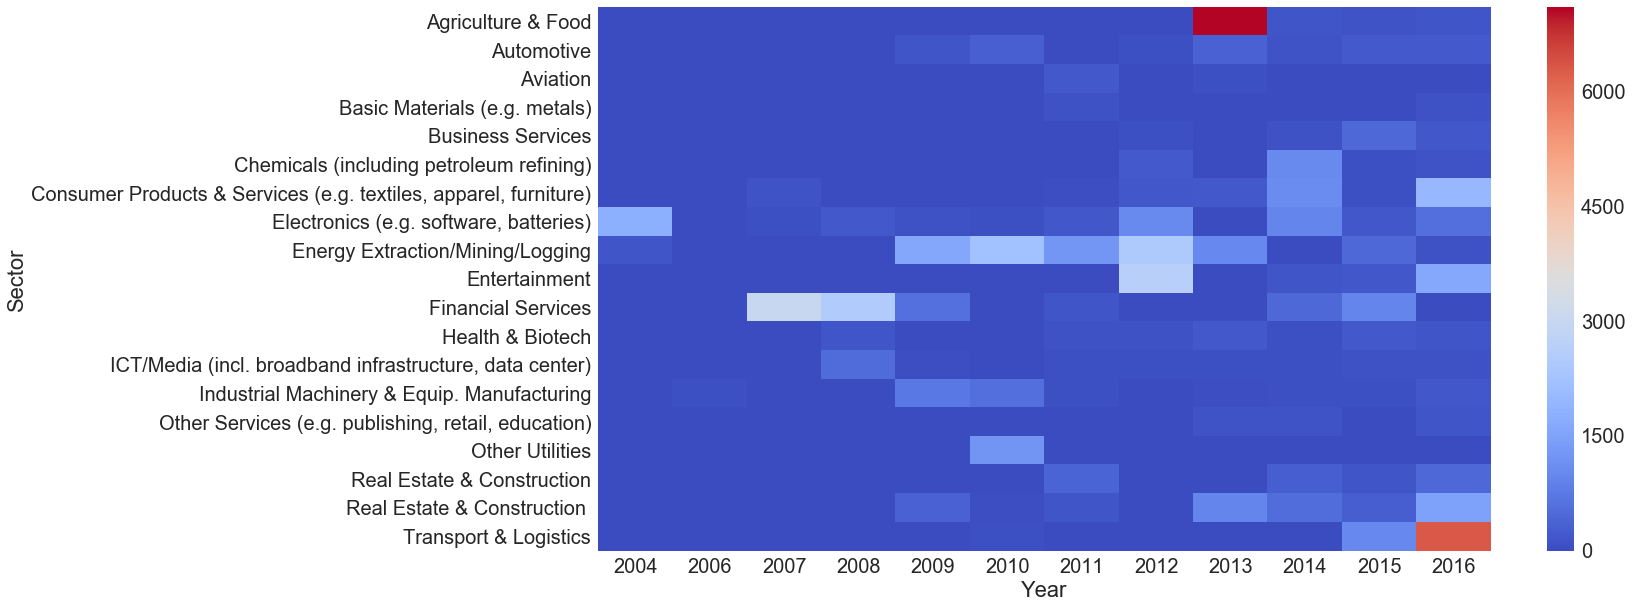

In [26]:
midpoint = (c.values.max() - c.values.min()) / 2
sns.heatmap(c, cmap='coolwarm', center=midpoint)

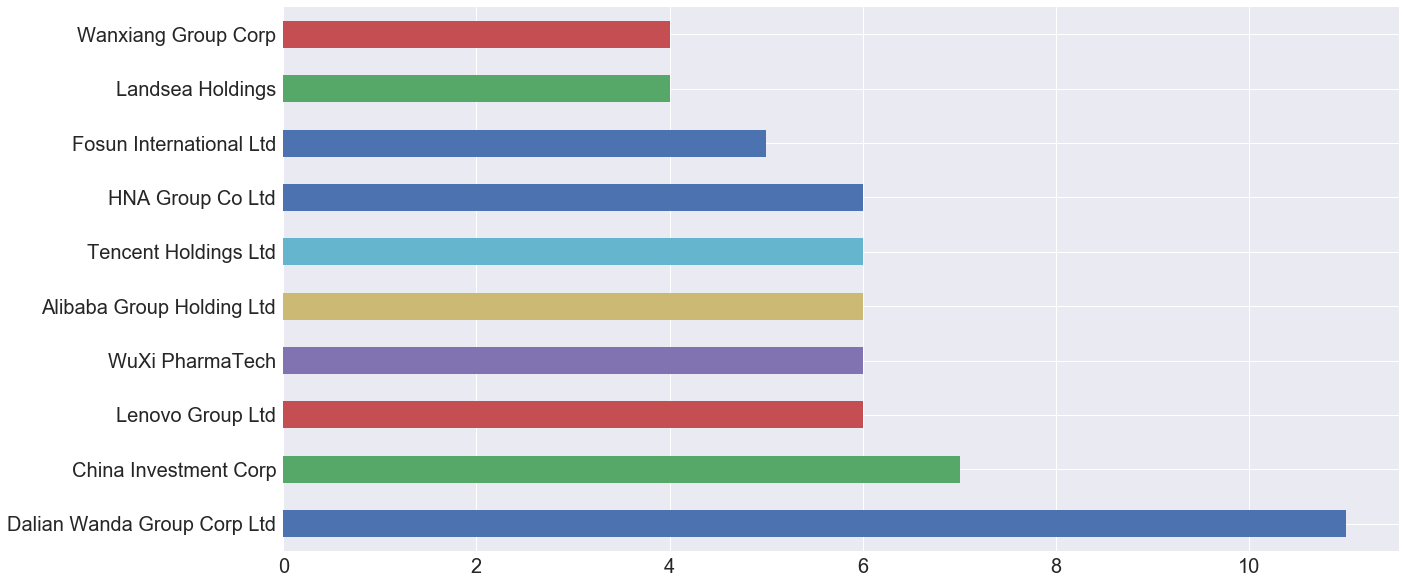

In [51]:
h = df['Foreign_Acquirer'].value_counts()[:10]
h.plot(kind='barh')

In [70]:
h.head(20)

Dalian Wanda Group Corp Ltd    11
China Investment Corp           7
Lenovo Group Ltd                6
WuXi PharmaTech                 6
Alibaba Group Holding Ltd       6
Tencent Holdings Ltd            6
HNA Group Co Ltd                6
Fosun International Ltd         5
Landsea Holdings                4
Wanxiang Group Corp             4
Name: Foreign_Acquirer, dtype: int64